In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as constant
from scipy.fft import fft, fftfreq
from scipy.integrate import solve_ivp

Define function for coupled oscillator:

In [3]:
def coupled_harmonic_oscillator(t, y, k=1, m=1, alph=0):
    """
    Differential equation for a coupled oscillator system.
    """
    x1, v1, x2, v2 = y
    dx1dt = v1
    dx2dt = v2
    dv1dt = -(k/m)*x1 - (alph/m)*x2
    dv2dt = -(k/m)*x2 - (alph/m)*x1
    return [dx1dt, dv1dt, dx2dt, dv2dt]

Set up solution, with all variables treated as dimensionless:

In [4]:
# Initial conditions and time span
tmax    = 10000
delta_t = 0.1
y0      = [1, -1, 0, 0] # initial positions and speeds (x1,x2,v1,v2)
t_span  = [0, tmax] # time span of integration

# System parameters 
k    = 2 # spring constant
alph = 0.1 # coupling constant
m    = 1 # mass 

# Angular frequencies
omega0 = np.sqrt(k/m)
omega_delta = np.sqrt(alph/m)
omega_m = np.sqrt(omega0**2 - omega_delta**2)
omega_p = np.sqrt(omega0**2 + omega_delta**2)

# Time points where we evaluate the solution
t_eval = np.arange(0, tmax, delta_t)

Solve the differential equation using RK4 solver and test energy conservation:

In [6]:
sol = solve_ivp(coupled_harmonic_oscillator, t_span, y0, args=(k,m,alph), method='RK45',t_eval=t_eval,rtol=1e-7,atol=1e-7)

# Extract the solution components
t = sol.t
x1 = sol.y[0]
v1 = sol.y[1]
x2 = sol.y[2]
v2 = sol.y[3]

# Calculate the system energy and test energy conservation
T = 0.5*m*v1**2 + 0.5*m*v2**2 # kinetic
V = 0.5*k*x1**2 + 0.5*k*x2**2 + alph*x1*x2 # potential
E = T + V
percent_error = 100*np.abs(E[-1]-E[0])/np.abs(E[0])
print('Percentage error in energy = ',round(percent_error,2),'%')

# Perform the Fourier transform
dt         = t[1] - t[0]    # time step
n          = len(t)         # number of time points
freq       = fftfreq(n, dt) # frequency array
xf         = fft(x1)        # Fourier transform of x
Xsq        = np.abs(xf)**2
X_disp_max = max(Xsq)*5

Percentage error in energy =  0.12 %


Plot and save results:

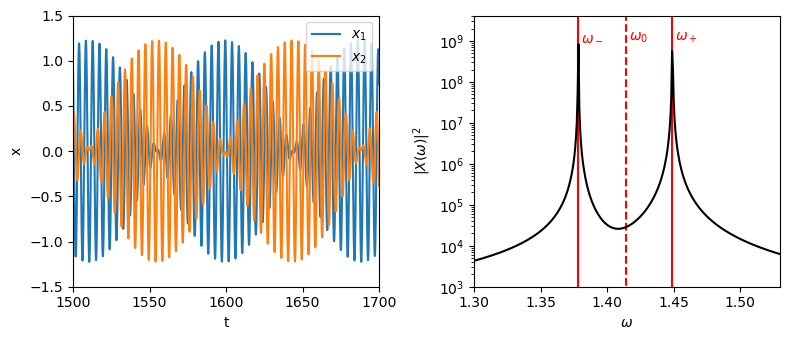

In [8]:
# Plot the solution
plt.figure(figsize=(8, 3.5))

# Plot the time-varying data
plt.subplot(1,2,1)
plt.plot(t,x1,label='$x_1$')
plt.plot(t,x2,label='$x_2$')
plt.xlabel('t')
plt.ylabel('x')
plt.xlim([1500,1700])
plt.ylim([-1.5,1.5])
plt.legend(loc='upper right')

# Plot the power spectrum
plt.subplot(1,2,2)
plt.semilogy(omega0*np.array([1,1]),np.array([0,X_disp_max]),color='r',linestyle='--')
plt.plot(omega_m*np.array([1,1]),np.array([0,X_disp_max]),color='r')
plt.plot(omega_p*np.array([1,1]),np.array([0,X_disp_max]),color='r')
plt.plot(2*np.pi*freq,Xsq,color='k')
plt.xlabel('$\omega$')
plt.ylabel('$|X(\omega)|^2$')
plt.xlim([0, 2])
plt.xlim([1.3, 1.53])
plt.ylim([1e3, X_disp_max])
plt.text(omega0+0.002,1e9,'$\omega_0$',color='r')
plt.text(omega_m+0.002,1e9,'$\omega_-$',color='r')
plt.text(omega_p+0.002,1e9,'$\omega_+$',color='r')
plt.tight_layout()

# Save the results
plt.savefig('../figures/coupled_oscillator.pdf', format='pdf', dpi=300, bbox_inches='tight')